# Get all sets

In [1]:
import itertools
from collections import namedtuple

In [2]:
# card namedtuple type
Card = namedtuple('card', ['number', 'color', 'shape', 'shade'])

In [3]:
# characteristics
numbers = ['one', 'two', 'three']
colors = ['green', 'purple', 'red']
shapes = ['diamond', 'squiggle', 'oval']
shades = ['open', 'solid', 'striped']

In [4]:
# create all cards 
all_cards = {
    Card(number=number, color=color, shape=shape, shade=shade)
    for number in numbers
    for color in colors
    for shape in shapes
    for shade in shades
}

In [5]:
print(f"There are {len(all_cards)} cards in total.")

There are 81 cards in total.


In [6]:
all_cards_list = list(all_cards)
possible_sets = list(itertools.combinations(all_cards_list, 3))

In [7]:
print(f"There are {len(possible_sets):,} different 3 card combinations in total.")

There are 85,320 different 3 card combinations in total.


In [8]:
def check_if_valid(candidate_set):
    set_numbers = set()
    set_colors = set()
    set_shapes = set()
    set_shades = set()
    
    for card in candidate_set:
        set_numbers.add(card.number)
        set_colors.add(card.color)
        set_shapes.add(card.shape)
        set_shades.add(card.shade)

    set_totals = {len(set_numbers), len(set_colors), len(set_shapes), len(set_shades)}
    
    if set_totals in [{1},{3},{1,3}]:
        return True
    
    return False

In [9]:
valid_sets, invalid_sets = set(), set()

for candidate_set in possible_sets:
    (valid_sets if check_if_valid(candidate_set) else invalid_sets).add(candidate_set)

In [10]:
assert len(valid_sets)+len(invalid_sets) == len(possible_sets)

In [11]:
print(f"There are {len(valid_sets):,} valid sets and {len(invalid_sets):,} invalid sets.")

There are 1,080 valid sets and 84,240 invalid sets.


# Get training dataset for DL task 
Dataset obtained from Kaggle: https://www.kaggle.com/datasets/kwisatzhaderach/set-cards

In [12]:
import os

In [13]:
def print_folder_tree(base_dir, indent=''):
    items = os.listdir(base_dir)
    
    items = [item for item in items if os.path.isdir(os.path.join(base_dir, item))]
    
    for index, item in enumerate(items):
        item_path = os.path.join(base_dir, item)
        is_last = index == len(items) - 1
        
        if is_last:
            print(indent + '└── ' + item)
            new_indent = indent + '    '
        else:
            print(indent + '├── ' + item)
            new_indent = indent + '│   '
        
        print_folder_tree(item_path, new_indent)

In [14]:
base_dir = 'dataset'
print_folder_tree(base_dir)

├── one
│   ├── green
│   │   ├── diamond
│   │   │   ├── solid
│   │   │   ├── striped
│   │   │   └── open
│   │   ├── squiggle
│   │   │   ├── solid
│   │   │   ├── striped
│   │   │   └── open
│   │   └── oval
│   │       ├── solid
│   │       ├── striped
│   │       └── open
│   ├── red
│   │   ├── diamond
│   │   │   ├── solid
│   │   │   ├── striped
│   │   │   └── open
│   │   ├── squiggle
│   │   │   ├── solid
│   │   │   ├── striped
│   │   │   └── open
│   │   └── oval
│   │       ├── solid
│   │       ├── striped
│   │       └── open
│   └── purple
│       ├── diamond
│       │   ├── solid
│       │   ├── striped
│       │   └── open
│       ├── squiggle
│       │   ├── solid
│       │   ├── striped
│       │   └── open
│       └── oval
│           ├── solid
│           ├── striped
│           └── open
├── zthree
│   ├── green
│   │   ├── diamond
│   │   │   ├── solid
│   │   │   ├── striped
│   │   │   └── open
│   │   ├── squiggle
│   │   │   ├── solid
│   │   │   ├── str

# Detecting cards

In [26]:
test_image = 'test_images/test_1.png'

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

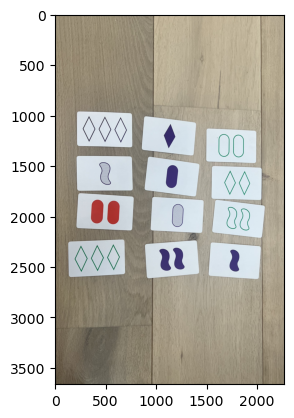

In [34]:
image = cv2.imread(test_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

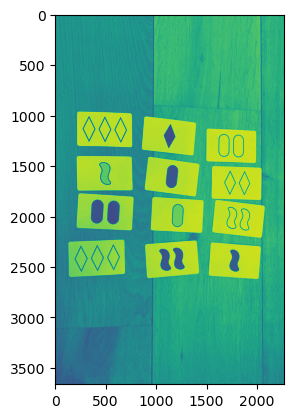

In [38]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

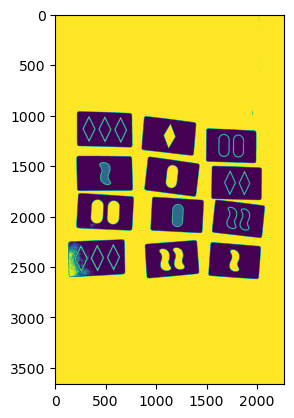

In [58]:
_, mask = cv2.threshold(gray, 200, 20, cv2.THRESH_BINARY_INV)
plt.imshow(mask)